In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [133]:
plt.style.use("seaborn-notebook")

# Football Players Overall Predictor For FIFA 18
## Author: Kostadin Kostadinov

![alternative text](logo.jpg)

## Abstract
This is a football players overall predictor based on FIFA 18. Our data contains over 18 000 players with theirs characteristics, weak sides and strong sides. Based on this data this project will predict the overall rating(it can be from 1 to 100).

__We will:__
-  Apply some preprocessing steps to prepare the data.
- Then, we will perform a descriptive analysis of the data to better understand the main characteristics that they have.
- We will continue by training different machine learning models using scikit-learn.
- Then, we will iterate and evaluate the learned models by using unseen data. Later, we will compare them until we find a good model that meets our expectations.
- Once we have chosen the candidate model, we will use it to perform predictions and to create a simple web application that consumes this predictive model.

### Loading and cleaning our data

We will load the dataset with the players and apply some cleaning and transformation.


In [245]:
col_types = {'Overall': np.int32, 'Age': np.int32}

players_data = pd.read_csv("data/football_players_data.csv", low_memory=False,dtype = col_types)
players_data = players_data.drop("Unnamed: 0",axis=1)
print(players_data.shape)
players_data.head()

(17981, 74)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset has a lot of columns.

In [246]:
players_data.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB',
       'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Preferred Positions',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In the value column we have characters, not only numbers, we will remove the euro sign, M(millions) and K(thousands). 

In [247]:
players_data.Value = players_data.Value.str.replace('€','')

def parseValue(strVal):
    """
    Parse string with M or K to numeric values
    """
    if 'M' in strVal:
        return int(float(strVal.replace('M', '')) * 1000000)
    elif 'K' in strVal:
        return int(float(strVal.replace('K', '')) * 1000)
    else:
        return int(strVal)
    
players_data['Value'] = players_data['Value'].apply(lambda x: parseValue(x))

In [248]:
players_data.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now is better. Let now check for invalid value. An invalid value is a value smaller than or equal to 0. If we don't remove such values they can "break" the training models for example - they can cause overfitting. We are going to get only the players with positive value.

In [249]:
players_data = players_data.loc[players_data.Value > 0]
players_data.shape

(17725, 74)

We have removed over 200 invalid for our case entries. Let's now make the same thing but for the players overall.

In [250]:
players_data = players_data.loc[players_data.Overall > 0]
players_data.shape

(17725, 74)

The Overall is valid. Let's now remove all non-numeric entries from the skills columns.

In [251]:
def remove_non_numeric_entries(dataset, column):
    """
    Remove all non-numeric entries in the column of the dataset
    """
    def between_1_and_99(s):
        try:
            n = int(s)
            return (1 <= n and n <= 99)
        except ValueError:
            return False
        
    dataset = dataset.loc[players_data[column].apply(lambda x: between_1_and_99(x))]
 
    dataset[column] = dataset[column].astype('int')
    
    return dataset

In [252]:
skills = ['Acceleration',
       'Aggression', 'Agility', 'Balance', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Ball control','Free kick accuracy',
       'GK diving', 'GK handling', 'GK kicking', 'GK positioning',
       'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning','Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed','Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys']

for skill in skills:
    players_data = remove_non_numeric_entries(players_data,skill)

/home/kosta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now all skill columns are int type. I think that for now this cleaning process is enough and now we can go to the data analysis.

### Data analysis(Descriptive analysis)

Now that the data is ready, before we start applying machine learning algorithms, a good approach is to first explore, play with, and query the data to get to know it better. The main objective here is to have a very good understanding of our data. If you skip this phase, you’ll feel like you’re on a blind date with it later :). So, let’s explore the data and get to know what we’re working with!

In [253]:
players_data.describe()

,Age,Overall,Potential,Value,Special,Acceleration,Aggression,Agility,Balance,Ball control,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17068.000000,17068.000000,17068.000000,1.706800e+04,17068.000000,17068.000000,17068.000000,17068.000000,17068.000000,17068.000000,...,15143.000000,15143.000000,15143.000000,15143.000000,15143.000000,15143.000000,15143.000000,15143.000000,15143.000000,15143.000000
mean,25.107160,66.179927,71.167624,2.397471e+06,1592.323119,64.495430,55.751582,63.304078,63.765878,58.067143,...,56.912963,55.489401,58.440600,56.801294,58.960972,59.987123,58.137093,59.292082,57.631447,58.137093
std,4.607072,7.005938,6.083863,5.414937e+06,271.922785,14.937382,17.473375,14.793807,14.139986,16.785885,...,9.796763,12.205490,8.872653,10.313374,9.909756,9.339452,9.160414,9.967127,9.145452,9.160414
min,16.000000,46.000000,46.000000,1.000000e+04,728.000000,11.000000,11.000000,14.000000,11.000000,8.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,3.250000e+05,1447.000000,56.000000,43.000000,55.000000,55.000000,53.000000,...,50.000000,45.000000,52.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,7.000000e+05,1632.000000,67.000000,59.000000,65.000000,66.000000,63.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,2.100000e+06,1784.000000,75.000000,69.000000,74.000000,74.000000,69.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,66.000000,65.000000,66.000000,64.000000,65.000000
max,44.000000,94.000000,94.000000,1.230000e+08,2291.000000,96.000000,96.000000,96.000000,96.000000,95.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


Let's check which are the ten best players in this dataset and in the world and which are the ten worst players in this dataset.

In [254]:
players_data.nlargest(10,"Overall")

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000000,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90500000,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,79000000,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,77000000,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [255]:
players_data.nsmallest(10,"Overall")

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
17973,T. Sawyer,18,https://cdn.sofifa.org/48/18/players/240403.png,England,https://cdn.sofifa.org/flags/14.png,46,58,Grimsby Town,https://cdn.sofifa.org/24/18/teams/92.png,50000,...,45.0,42.0,45.0,43.0,46.0,47.0,45.0,47.0,46.0,45.0
17974,J. Keeble,18,https://cdn.sofifa.org/48/18/players/240404.png,England,https://cdn.sofifa.org/flags/14.png,46,56,Grimsby Town,https://cdn.sofifa.org/24/18/teams/92.png,40000,...,46.0,45.0,34.0,41.0,33.0,35.0,33.0,34.0,44.0,33.0
17975,T. Käßemodel,28,https://cdn.sofifa.org/48/18/players/235352.png,Germany,https://cdn.sofifa.org/flags/21.png,46,46,FC Erzgebirge Aue,https://cdn.sofifa.org/24/18/teams/506.png,30000,...,37.0,38.0,45.0,42.0,42.0,42.0,41.0,41.0,38.0,41.0
17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,50000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,60000,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,60000,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0
17980,L. Sackey,18,https://cdn.sofifa.org/48/18/players/238308.png,Ghana,https://cdn.sofifa.org/flags/117.png,46,64,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,50000,...,40.0,45.0,30.0,38.0,29.0,30.0,31.0,29.0,38.0,31.0
17957,D. Peppard,17,https://cdn.sofifa.org/48/18/players/236807.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,61,Bohemian FC,https://cdn.sofifa.org/24/18/teams/305.png,50000,...,46.0,45.0,41.0,45.0,39.0,42.0,37.0,40.0,46.0,37.0
17958,C. Rogers,17,https://cdn.sofifa.org/48/18/players/237859.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,59,Bray Wanderers,https://cdn.sofifa.org/24/18/teams/838.png,40000,...,46.0,47.0,36.0,43.0,35.0,37.0,37.0,35.0,44.0,37.0
17959,N. McLaughlin,18,https://cdn.sofifa.org/48/18/players/225319.png,Scotland,https://cdn.sofifa.org/flags/42.png,47,64,Partick Thistle F.C.,https://cdn.sofifa.org/24/18/teams/1754.png,60000,...,43.0,40.0,46.0,44.0,47.0,48.0,46.0,47.0,44.0,46.0


Lets see the distribution of the players based on overall. We will plot a histogram for that. It is interesting to see(atleast to me) is this a normal distribution(Gaussian).

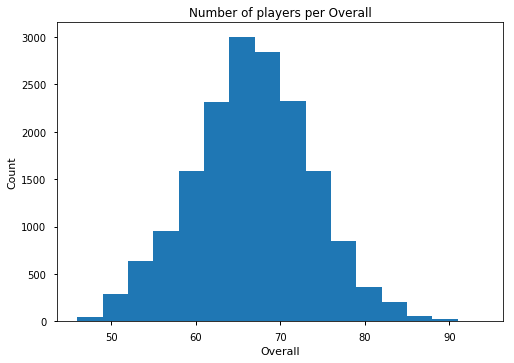

The mean value for the Overall feature is  66.17992734942582  and the standard deviation is  7.005938114936933


In [256]:
plt.hist(players_data.Overall,bins = 16)
plt.title("Number of players per Overall")
plt.xlabel("Overall")
plt.ylabel("Count")
plt.show()
overall_mean = players_data.Overall.mean()
overall_std = players_data.Overall.std()
print('The mean value for the Overall feature is ', overall_mean, ' and the standard deviation is ', overall_std)


Let's begin to build the training models.

## Building training models

I will compare some famous training models, get the best for this project and use it in the web app that we will make. We will try four types of regressions and compare them.

### Linear Regression

We will make a linear regression with a standart 70/30 data split and we will compare it with scaled values and without.

In [257]:
train, test = train_test_split(players_data,train_size = 0.7, test_size=0.3)
 
x_train = train[['Value']]
y_train = train[['Overall']]
 
x_test = test[['Value']]
y_test = test[['Overall']]

Since it’s reasonable to think that there could be a linear relationship between a player’s market value and how good they are, then we can apply a linear regression with values and overalls.

In [258]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
print("Score: ",linear_model.score(x_test, y_test))

Score:  0.39137364705072963


It is not so good at all(only 39% accuracy).Now let’s plot the line that represents our linear model and also get the MSE(mean squarred error).

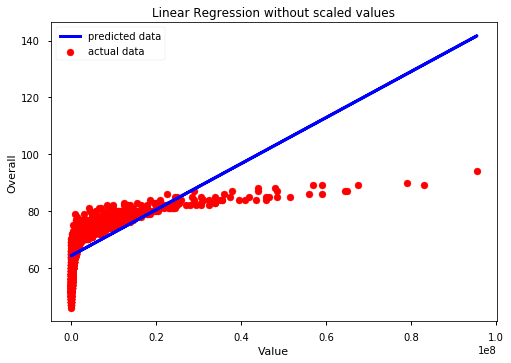

Score on testing data:  0.39137364705072963
Mean squared error score on testing data:  30.152897438256744


In [259]:
y_pred = linear_model.predict(x_test) #needed for ploting our linear regression

plt.scatter(x_test, y_test,  color='red', label="actual data")
plt.plot(x_test, y_pred, color='blue', linewidth=3, label="predicted data")
plt.xlabel("Value")
plt.ylabel("Overall")
plt.title("Linear Regression without scaled values")
plt.legend()
plt.show()
print("Score on testing data: ",linear_model.score(x_test, y_test))
print("Mean squared error score on testing data: ", mean_squared_error(y_test,y_pred))

Something interesting with that model is that it predict some players overall when its value is below 30000000. And such players are a big procent of our data.

% of players with a value lower that €30M:  99.31450667916569 %


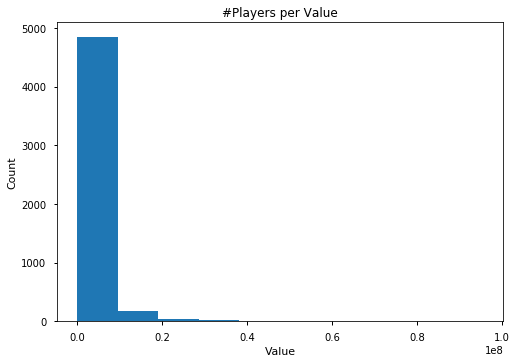

In [260]:
print('% of players with a value lower that €30M: ', players_data[players_data.Value <= 30000000].Value.count() / players_data.Value.count() * 100, '%')

plt.hist(test.Value)
plt.title("#Players per Value")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

In [265]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

y_pred_scaled = linear_model.predict(x_test_scaled)

In [264]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train_scaled)
print("Score: ",linear_model.score(x_test_scaled, y_test_scaled))
print("Mean Squarred error on scaled testing data: ",mean_squared_error(y_test_scaled,y_pred_scaled))

Score:  0.33370183300614126
Mean Squarred error on scaled testing data:  4073.0888095401706


Here we have a smaller mean squared error but also a smaller score. Let's see if the next model will "beat" this linear regression. Now we will train a Ridge Regressin with Polynomial features.

### PolynomialFeatures and Ridge Regression

We can improve the score with Polynomial features Ridge Regression. I can't give a good deep explanation what is Ridge Regression but i have included some resources that i used to explain it to myself(a video and a post in Resources section). Basically it is like Linear Regressin but we make some biases for the training data to make a better long term predictions. Using Ridge regression (instead of the standard linear regression model) can help minimize overfitting.

From calculus, we know that a common and efficient way of computing a complex function is by approximating it by using polynomials. So, we can take this idea and assume that the data points in our dataset are points of a complex math function. Our goal is to find a polynomial that fits the curve of that function quite well.

In [268]:

pol = make_pipeline(PolynomialFeatures(8),Ridge())
pol.fit(x_train, y_train)

/home/kosta/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.250704e-130
  overwrite_a=True).T


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=8, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

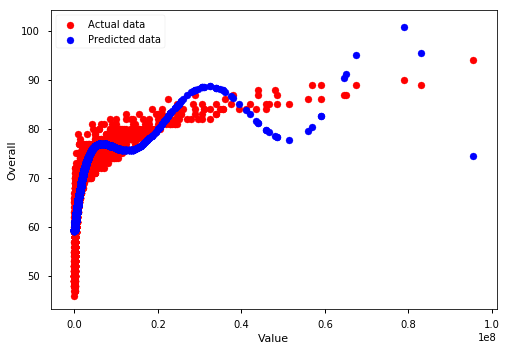

Mean squared error:  10.61767907277261
Variance score:  0.7856856275891944


In [269]:
y_pol = pol.predict(x_test)
plt.scatter(x_test, y_test,  color='red', label='Actual data')
plt.scatter(x_test, y_pol,  color='blue', label='Predicted data')
plt.xlabel("Value")
plt.ylabel("Overall")
plt.legend()
plt.show()
print("Mean squared error: ",mean_squared_error(y_test, y_pol))
print("Variance score: ", r2_score(y_test, y_pol))

We can now see that this is better than a regular Linear Regression.We have reduced MSE and increased R2. I choose the degree to be 8 because i have tried manually other degrees and it looks like this is the optimal.

## Support Vector Regression
At last let's try this model maybe it can help us to increased the R2 score and to reduce the mean squarred error even more. We will hypertune C(regularization) with GridSearchCV to get the best model.

In [293]:
tuned_params = [{"C": [1,10,100,1000]}]
grid_search = GridSearchCV(SVR(), tuned_params)
grid_search.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [294]:
svr_model = grid_search.best_estimator_
svr_model.fit(x_train, y_train.values.ravel())

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

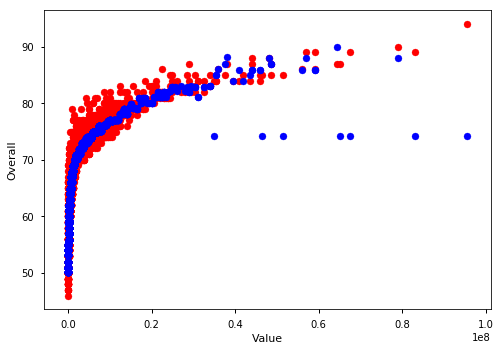

Mean squared error:  5.5531464717022025
Variance score:  0.8879115583706035


In [295]:
y_svr = svr_model.predict(x_test)
plt.scatter(x_test, y_test,  color='red')
plt.scatter(x_test, y_svr,  color='blue')
plt.xlabel("Value")
plt.ylabel("Overall")
plt.show()

print("Mean squared error: ", mean_squared_error(y_test, y_svr)) 
print("Variance score: ", r2_score(y_test, y_svr))

This is really very good! We were able to considerably reduce the MSE and also increase the R2 score in an important way.

## Adding more features to improve predictions
We have used only the value to predict, now is time to add more features.

## Conclusion

## Resources

Video about Ridge Regression: https://www.youtube.com/watch?v=Q81RR3yKn30

Info about Ridge Regression: https://www.quora.com/What-is-ridge-regression-1

Dataset: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset#CompleteDataset.csv
